## Topics covered
### Basic
1. Cleaning text
    - numbers
    - punctuation
    - whitespace
    - accented characters
    - case conversion
    - abbreviations
2. Tokenization
3. Removing stopwords
4. Stemming/Lemmatization

### Advanced
5. Removing URL/html tags
6. Cleaning/Expanding emoticons/emoji.
7. POS Tagging
8. Chunking
9. NER Tagging

In [1]:
DATA_PATH='./data/text.txt'

### Reading text from files
- open(filename,mode) : Returns a file object for `filename` in `mode`.
- f.readlines() : Returns all lines in f as a list.
- f.readline() : Returns single line from f.
- f.read(size=-1) : Returns `size` bytes from f. 

Reference : https://docs.python.org/3/tutorial/inputoutput.html 

In [2]:
with open(DATA_PATH,'r') as F:
    text=F.read()
    print(text[:50])

﻿The Project Gutenberg EBook of Crime and Punishme


If the file is too large to fit in memory, one way is to read using for loop and process text line by line. An alternative is to read text in chunks by using the `size` argument in read function.

### Regular Expressions
`re` package for regular expressions in python. Important functions:
- re.match(pattern,text) : Matches `pattern` to beginning of `text`. Returns `match` object. 

- re.search(pattern,text) : Matches `pattern` to first occurrence in `text`. Returns `match` object.

- re.findall(pattern,text) : Finds all non-overlapping occurrences of `pattern` in `text`. Returns python list.

- re.sub(pattern,replacement,text) : Substitutes all leftmost non-overlapping occurrences of pattern in text by replacement. Returns replaced string. `replacement` can be a string or a function. If it is a function, it takes a single `match` object as input and returns string.

- re.split(pattern,text)  : Splits `text` with `pattern`. Returns list of strings.

Reference : https://docs.python.org/3/library/re.html

### Cleaning Data
#### Handling Numbers
- Using inflect 

Reference : https://pypi.org/project/inflect/


In [3]:
# Removing numbers using re
import re
text= "There are 12 items in a dozen, and 20 in a score."
modified_text = re.sub(r'\d+','',text)

print(text)
print(modified_text)

There are 12 items in a dozen, and 20 in a score.
There are  items in a dozen, and  in a score.


In [4]:
# Replacing numbers using inflect and re
import inflect
import re

text= "There are 12 items in a dozen, and 20 in a score."
inflect_engine = inflect.engine()

def replace_number(match_obj):
    matched_string = match_obj.group()
    return inflect_engine.number_to_words(matched_string)

modified_text = re.sub(r'\d+',replace_number,text)

print(text)
print(modified_text)

There are 12 items in a dozen, and 20 in a score.
There are twelve items in a dozen, and twenty in a score.


#### Handling Punctuation
- str.maketrans(x,y,z) : Returns a translation table to map chars in `x` to corresponding chars in `y` and chars in `z` to `None`.
- string.punctuation : Constant string containing all punctuation symbols.

In [5]:
import string
print('Python default punctuation: ', string.punctuation)

text = "Some [text], {;with? ra@ndom punctuation !"

translator = str.maketrans('','',string.punctuation)
modified_text = text.translate(translator)

print(text)
print(modified_text)

Python default punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Some [text], {;with? ra@ndom punctuation !
Some text with random punctuation 


#### Handling Whitespace

In [6]:
text = "   \t Some text with extra whitespace   "
modified_text = text.strip()

print('')
print(text)
print(modified_text)


   	 Some text with extra whitespace   
Some text with extra whitespace


#### Handling Accented Characters
- Using unidecode

Reference : https://pypi.org/project/Unidecode/

In [7]:
import unidecode

text = "Would you like to have latté at our café?"
modified_text = unidecode.unidecode(text)

print(text)
print(modified_text)

Would you like to have latté at our café?
Would you like to have latte at our cafe?


#### Handling Case Conversion

In [8]:
text = 'Text having bOth SmAll aNd CapItal LetterS.'
modified_text_small = text.lower()
modified_text_capital = text.upper()

print(text)
print(modified_text_small)
print(modified_text_capital)

Text having bOth SmAll aNd CapItal LetterS.
text having both small and capital letters.
TEXT HAVING BOTH SMALL AND CAPITAL LETTERS.


#### Handling Abbreviations
- Using spacy. Note that this is not perfect. Ex, didn't -> do not, I'm -> I be, gonna -> go to 

In [9]:
import spacy
# run python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

text= u"Oh no he didn't. I can't and I won't. I'll know what I'm gonna do."
doc = nlp(text)
modified_text = " ".join([token.lemma_ if token.pos_ is not 'PRON' else token.text for token in doc])

print(text)
print(modified_text)

Oh no he didn't. I can't and I won't. I'll know what I'm gonna do.
oh no he do not . I can not and I will not . I will know what I be go to do .


### Tokenization
- str.split(separator=' ') : Returns list of tokens separated by `separator` in `str`.
- nltk : `word_tokenizer` and `sentence_tokenizer` in nltk.
- spacy : by creating a doc from `en` model.

In [10]:
# Using python's split
with open(DATA_PATH,'r') as F:
    text = F.read()
    tokens = text.split()
    
    print("Tokens : ",end='')
    print(tokens[:50])
    print("Number of tokens : ",len(tokens))

Tokens : ['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment,', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this']
Number of tokens :  206530


In [11]:
# Using nltk
# run python -m nltk.downloader all
with open(DATA_PATH,'r') as F:
    from nltk import word_tokenize
    text = F.read()
    
    tokens = word_tokenize(text)
    print(tokens[:50])


['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License']


In [12]:
# Using spacy
import spacy
# run python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

with open(DATA_PATH,'r') as F:
    text = F.read()
    #creating spacy doc of first 10k characters. default max limit is 1000000
    doc = nlp(text[:10000])
    
    #first 50 tokens
    tokens = [ token for token in doc[:50]]
    print(tokens)


[﻿The, Project, Gutenberg, EBook, of, Crime, and, Punishment, ,, by, Fyodor, Dostoevsky, 

, This, eBook, is, for, the, use, of, anyone, anywhere, at, no, cost, and, with, 
, almost, no, restrictions, whatsoever, .,  , You, may, copy, it, ,, give, it, away, or, 
, re, -, use, it, under, the]


Notice the different tokens generated by above methods. Example- comma, fullstops and hyphens. 

### Removing Stopwords
- nltk, spacy and sklearn provide a set of English stopwords to filter.
##### Use following imports for spacy/sklearn
- spacy : `from spacy.lang.en.stop_words import STOP_WORDS` 
- sklearn : `from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS` 



In [13]:
# Using nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text = 'NLTK is a leading platform for building Python programs to work with human language data.'
tokens = word_tokenize(text)

result = [i for i in tokens if not i in stop_words]
print (result)

['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.']


Specific words can be removed by adding to these stopword sets.

### Stemming and Lemmatization
- Stemming - root may not be a dictionary word. Fast.
- Lemmatization - root is always a dictionary word. Slow.

In [14]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokens = ['compute', 'computer', 'computed', 'computing','computers']

print("Porter Stemmer")
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

Porter Stemmer
compute --> comput
computer --> comput
computed --> comput
computing --> comput
computers --> comput


- from nltk.stem.snowball import SnowballStemmer
- stemmer = SnowballStemmer(language='english')

uses SnowballStemmer which is an improvement over Porter Stemmer



In [15]:
# Using spacy
import spacy
# run python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

tokens = ['compute', 'computer', 'computed', 'computing','computers']
doc=nlp(" ".join(tokens))

print("Lemmatization")
for token in doc:
    print(token,'-->',token.lemma_)


Lemmatization
compute --> compute
computer --> computer
computed --> compute
computing --> compute
computers --> computer


- from nltk.stem import WordNetLemmatizer 
- lemmatizer = WordNetLemmatizer() 
- lemmatizer.lemmatize(word, pos ='v') # pos is part of speech tag

can be used for lemmatization with nltk.

### Removing URLs and html tags

In [16]:
# Removing URL from data using regex

text = "Driverless AI NLP blog post on https://www.h2o.ai/blog/detecting-sarcasm-is-difficult-but-ai-may-have-an-answer/"
modified_text = re.sub(r'https?://\S+|www\.\S+','',text)

print(text)
print(modified_text)

Driverless AI NLP blog post on https://www.h2o.ai/blog/detecting-sarcasm-is-difficult-but-ai-may-have-an-answer/
Driverless AI NLP blog post on 


In [17]:
# Removing html tags using regex

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

modified_text = re.sub(r'<.*?>',"",text)

print(text)
print(modified_text)

<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>

 H2O
 AutoML
 Driverless AI



- from bs4 import BeautifulSoup
- BeautifulSoup(text, "lxml").text

can also be used to get same result.

### Handling emotiocns and emoji in data
- Emoticons :  :) :D 
- Emoji :  🔥

Reference : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py 
A useful emoticon and emoji dictionary.

In [18]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [19]:
# For illsutration we are hardcoding values from dictionary referenced above.
EMOTICONS = {
    u":-\)":"Happy face or smiley"}

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [20]:
# Converting emoticons to words

# For illsutration we are hardcoding values from dictionary referenced above.
EMOTICONS = {
    u":-\)":"Happy face or smiley"}

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

text = "Hello :-) :-)"
convert_emoticons(text)

'Hello Happy_face_or_smiley Happy_face_or_smiley'

In [21]:
# Converting emoji to words

# For illsutration we are hardcoding values from dictionary referenced above.
UNICODE_EMO={
    '🔥' : 'fire'
}
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

text = "game is on 🔥"
convert_emojis(text)

'game is on fire'

### POS Tagging 

In [22]:
# Using nltk

from nltk.tokenize import word_tokenize 
from nltk import pos_tag 
  
text = "This is a sentence written by me."
tags = pos_tag([token for token in word_tokenize(text)])

print(tags)


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sentence', 'NN'), ('written', 'VBN'), ('by', 'IN'), ('me', 'PRP'), ('.', '.')]


Similarly, token.pos_ gives the POS tag when using spacy.

### Chunking
Chunking is the process of extracting phrases from unstructured text and more structure to it. It is also known as shallow parsing. It is done on top of Part of Speech tagging. It groups word into “chunks”, mainly of noun phrases. Chunking is done using regular expressions. 

In [23]:
import nltk
from nltk.tokenize import word_tokenize  
from nltk import pos_tag 
  
# define chunking function with text and regular 
# expression representing grammar as parameter 
def chunking(text, grammar): 
    word_tokens = word_tokenize(text) 
  
    # label words with part of speech 
    word_pos = pos_tag(word_tokens) 
  
    # create a chunk parser using grammar 
    chunkParser = nltk.RegexpParser(grammar) 
  
    # test it on the list of word tokens with tagged pos 
    tree = chunkParser.parse(word_pos) 
      
    for subtree in tree.subtrees(): 
        print(subtree) 
      
sentence = 'the little yellow bird is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar) 

# Reference :https://www.geeksforgeeks.org/text-preprocessing-in-python-set-2/?ref=rp


(S
  (NP the/DT little/JJ yellow/JJ bird/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ yellow/JJ bird/NN)
(NP the/DT sky/NN)


### Named Entity Recognition

NER is used to extract information from unstructured text. It is used to classify entities present in a text into categories like a person, organization, event, places, etc. It gives us detailed knowledge about the text and the relationships between the different entities.



In [24]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk import pos_tag, ne_chunk 
  
def named_entity_recognition(text): 
    # tokenize the text 
    word_tokens = word_tokenize(text) 
  
    # part of speech tagging of words 
    word_pos = pos_tag(word_tokens) 
  
    # tree of word entities 
    print(ne_chunk(word_pos)) 
  
text = 'Joe works for Samsung so he went to Korea for a meetup.'
named_entity_recognition(text) 

# Reference :https://www.geeksforgeeks.org/text-preprocessing-in-python-set-2/?ref=rp


(S
  (PERSON Joe/NNP)
  works/VBZ
  for/IN
  (ORGANIZATION Samsung/NNP)
  so/RB
  he/PRP
  went/VBD
  to/TO
  (GPE Korea/NNP)
  for/IN
  a/DT
  meetup/NN
  ./.)


## A Comprehensive Analysis of Preprocessing for Word Representation Learning in Affective Tasks.
### (Babanejad et al, published in ACL 2020)

<i> All tables, results and details are taken from Babanejad's paper. </i>

#### Preprocessing techniques studied 
1. Basic : html, numbers, lowercasing, punctuations.
2. Spellcheck : Custom dictionary with ambiguity handled by majority frequency.
3. Negation : Custom dictionary. Ex: not happy -> sad
4. POS : Kept only Nouns, Verbs, Adverbs and Adjectives.
5. Stopwords : NLTK stopwords
6. Stemming : Snowball stemmer 

#### Affective Tasks 
- Sentiment Analysis : Binary classification, + or -
- Emotion Classification : Multiple classes. (happy, sad...)
- Sarcasm Detection : Binary classification.

#### Dataset

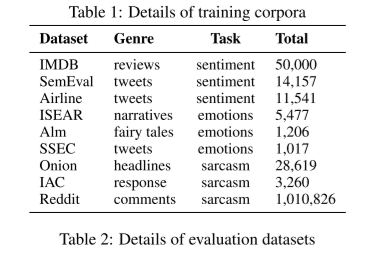

#### Size reduction due to preprocessing
- For some preprocessing (POS and stopwords removal) corpus size reduces drastically without significant vocabulary loss. Helpful in reducing training time.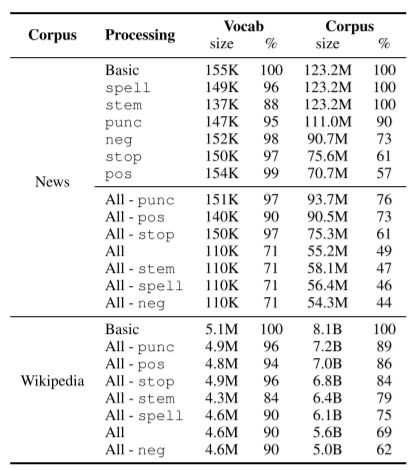

#### Classification Setup
- LSTM model with word vectors as inputs
- Binary crossentropy(Sentiment and Sarcasm) or categorical crossentropy(Emotion classification) as loss.
- Adam optimiser.

#### Results
- Even a single simple preprocessing step can bring improvement.
- Negation is the single most effective preprocessing step with consistent improvement across all 9 datasets.
- Second most effective is retaining only certain POS.
- Stopword removal, spell checking and stemming yield only little improvments and mixed results.
- All-stem and all-stop are best performing combinations.

## News corpus
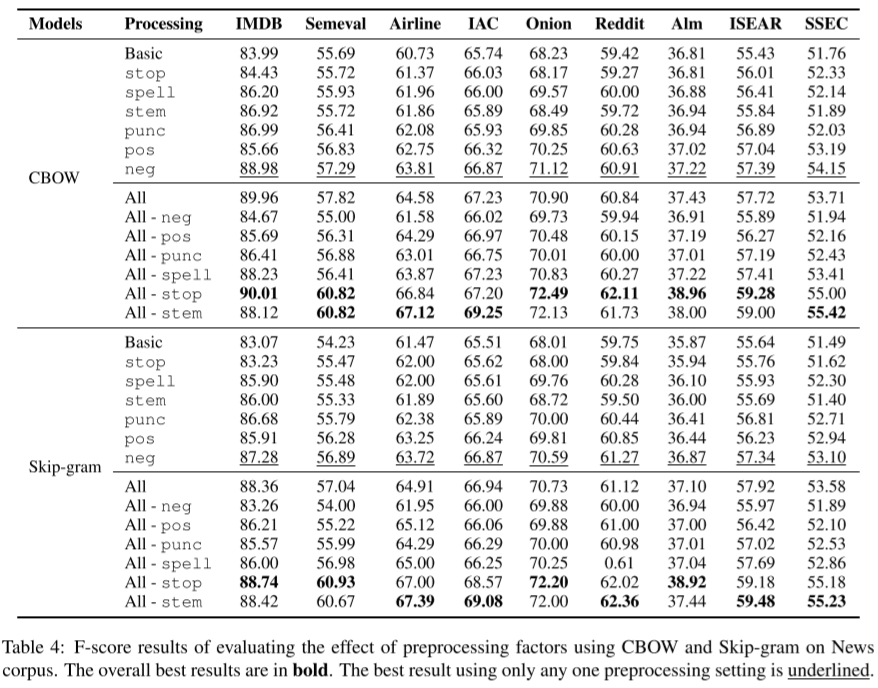

## Wikipedia corpus
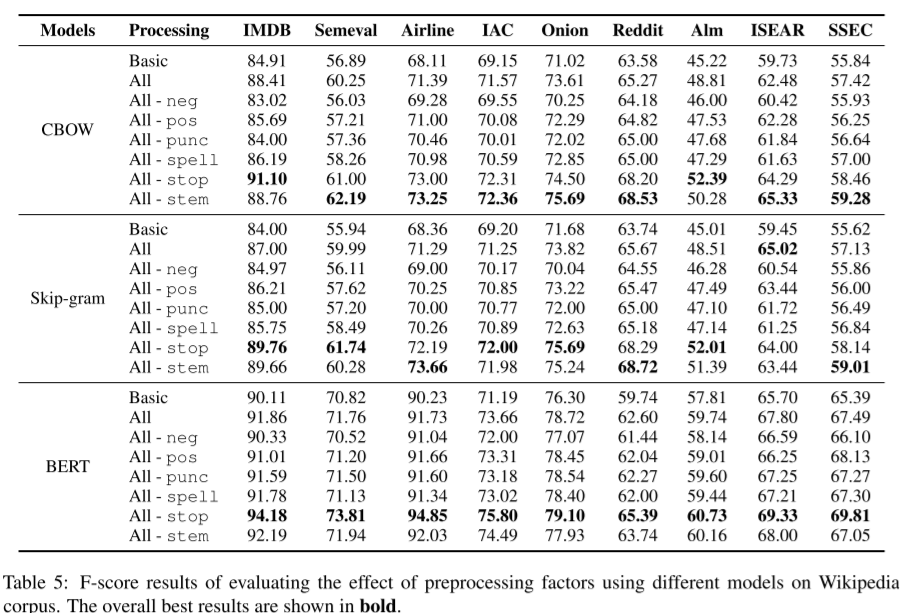

#### Pre vs post processing
- Pre : Apply preprocessing on training corpus for word vectors.
- Post : Apply preprocessing on classification dataset for testing.
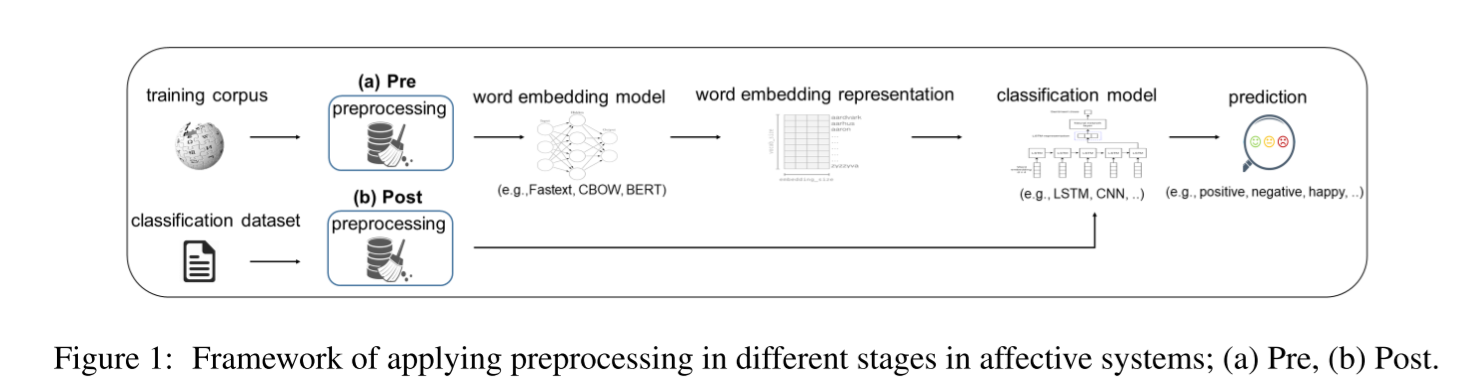

#### Results
- `Pre` outperforms `Post` across all 9 datasets.
- `Both` is seldom useful.

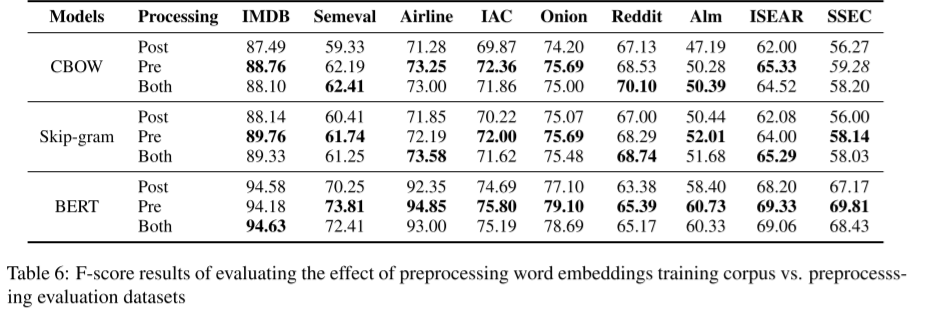

### Additional References
- https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/
- https://spacy.io/
- https://machinelearningmastery.com/clean-text-machine-learning-python/
- https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing 
- https://www.nltk.org/howto/stem.html
- https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79
- https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
- A Comprehensive Analysis of Preprocessing for Word Representation Learning in Affective Tasks. [Babanejad et al, 2020]
